In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.constants import golden 

plt.style.use('fivethirtyeight')
plt.rc('figure', figsize = (5.0, 5.0/golden)) 

pesca = pd.read_csv('pesca.csv', delimiter = ',', decimal=".")

pesca 

,giorno.settimana,peso.pescato,settore.di.pesca,settore.num,forza.del.mare,tempesta
0,1,5.168068,A,1,7,1
1,1,4.074747,A,1,7,1
2,1,7.358404,A,1,5,1
3,1,5.022524,A,1,5,1
4,1,5.826922,A,1,5,1
...,...,...,...,...,...,...
250,5,13.314936,I,9,5,1
251,5,17.445849,I,9,3,0
252,5,19.351561,I,9,1,0
253,5,17.939520,I,9,1,0


In [2]:
#2.1 Quante sono le giornate lavorative in una settimana al mercato del pesce?
len(pesca['giorno.settimana'].unique())

5

In [3]:
#2.2 Per quanti giorni sono state raccolte le informazioni ?
len(pesca)

255

In [8]:
#2.3 Quante volte si è pescato in condizioni di tempesta? Dare una risposta in termini di frequenza sia assoluta, sia relativa.
print('Frequenza assoluta: ', len(pesca[pesca['tempesta']==1]))
print('Frequenza relativa: ', len(pesca[pesca['tempesta']==1])/len(pesca))

Frequenza assoluta:  94
Frequenza relativa:  0.3686274509803922


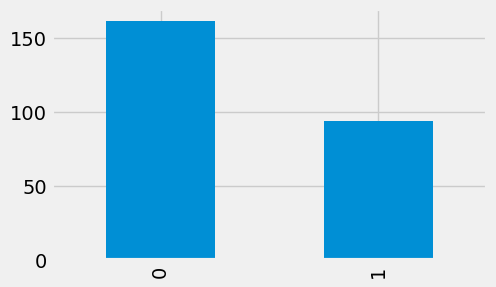

In [9]:
#2.4 Tracciare un grafico rappresentativo della frequenza di tempesta.
pesca['tempesta'].value_counts().plot.bar()
plt.show()

In [10]:
#2.5 Quanti sono i settori di pesca della parte di mare considerata?
len(pesca['settore.num'].unique())

9

In [13]:
#2.6 Qual è la frequenza relativa del settore "A"?
len(pesca[pesca['settore.di.pesca'] == 'A'])/len(pesca)

0.1450980392156863

In [15]:
#2.7 Produrre la tabella delle frequenze congiunte tra settore.di.pesca e tempesta.
settore_tempestaCong = pd.crosstab(index=pesca['settore.di.pesca'], columns=pesca['tempesta'])
settore_tempestaCong

tempesta,0,1
settore.di.pesca,,
A,24,13
B,28,24
C,19,14
D,3,2
E,24,16
F,5,3
G,20,11
H,8,1
I,30,10


In [25]:
'''
2.8 Utilizzare la tabella delle frequenze congiunte per stabilire, relativamente al settore di pesca "A", quanti sono 
stati i giorni di tempesta e quanti quelli senza tempesta.
'''
print('Giorni con tempesta nel settore A:',settore_tempestaCong.loc['A'][1])
print('Giorni senza tempesta nel settore A:',settore_tempestaCong.loc['A'][0])

Giorni con tempesta nel settore A: 13
Giorni senza tempesta nel settore A: 24


In [28]:
'''
2.9 Supponiamo, d’ora in poi, che sia verificata la condizione (realistica forse soltanto per alcune zone del pianeta) 
che le condizioni atmosferiche di un dato giorno siano indipendenti dalle condizioni atmosferiche di un altro giorno.
Sulla base dei dati a disposizione stimare la probabilità pT che oggi ci sia tempesta.
'''
pT = len(pesca[pesca['tempesta'] == 1]) / len(pesca)
pT

0.3686274509803922

In [29]:
#2.10 Qual è la taglia del campione che avete utilizzato nella stima di pT ?
len(pesca['tempesta'])

255

In [39]:
#2.11 Stimare la probabilità pTA che ci sia tempesta nel settore "A".
pescaTemp = pesca[pesca['tempesta'] == 1]
pTA = len(pescaTemp[pescaTemp['settore.di.pesca'] == 'A']) / len(pesca[pesca['settore.di.pesca'] == 'A'])
pTA

0.35135135135135137

In [42]:
'''
2.12 Un pescatore dice che ieri ha incontrato condizioni di tempesta. Qual è la probabilità che abbia lavorato 
nel settore di pesca "A"?
'''
pescatore = 1-len(pescaTemp[pescaTemp['settore.di.pesca'] == 'A'])/len(pesca)
pescatore

0.9490196078431372

In [48]:
'''
2.13 Qual è la taglia nA del campione che avete utilizzato al punto 11 per la
stima della probabilità che ci sia tempesta nel settore "A"?
'''
nA = len(pesca[pesca['settore.di.pesca'] == 'A'].dropna())
nA

37

In [49]:
'''
2.14 Si determini un limite inferiore per la probabilità di aver compiuto, nella
stima di pTA, un errore, in eccesso o in difetto, minore o uguale di 0.1.
'''
pta = pescaTemp[pescaTemp['settore.di.pesca'] == 'A'].mean()
var = pescaTemp[pescaTemp['settore.di.pesca'] == 'A'].var()
1-(var/(37*(0.1)**2))

C:\Users\cola0\AppData\Local\Temp\ipykernel_27528\1001979210.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pta = pescaTemp[pescaTemp['settore.di.pesca'] == 'A'].mean()
C:\Users\cola0\AppData\Local\Temp\ipykernel_27528\1001979210.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  var = pescaTemp[pescaTemp['settore.di.pesca'] == 'A'].var()


giorno.settimana   -5.930007
peso.pescato       -3.396466
settore.num         1.000000
forza.del.mare     -3.435204
tempesta            1.000000
dtype: float64